In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainfile = '../data/raw/train.csv'
testfile = '../data/raw/test.csv'

In [3]:
df_train = pd.read_csv(trainfile)
df_test = pd.read_csv(testfile)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [8]:
df_train.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [9]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [10]:
combine = [df_train, df_test]
for data in combine:
    data['Title']=data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [11]:
df_test['Title'].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [12]:
for data in combine:
    data["Female"]=np.where(data['Sex']=='female',1,0)

In [13]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Female
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,1


In [14]:
df_train.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.000,70.0,70.00,70.0
Col,2.0,58.000000,2.828427,56.00,57.000,58.0,59.00,60.0
Don,1.0,40.000000,NaN,40.00,40.000,40.0,40.00,40.0
Dr,6.0,42.000000,12.016655,23.00,35.000,46.5,49.75,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.000,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.000,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.750,48.5,50.25,52.0
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0
Miss,146.0,21.773973,12.990292,0.75,14.125,21.0,30.00,63.0


In [15]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Female
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1


In [16]:
#Fill missing age data in two ways: Random choices from distribution according to title, and according to mean

for data in combine:
    
    #Replace the rarer titles with a common "other" title
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
    #Calculate means of ages grouped by title
    means = data.groupby('Title', as_index=False).agg(
                      {'Age':['mean','std']})
    means.columns=['Title','Age_mean',"Age_std"]
    means=means.set_index('Title')
    

    #Make arrays of all the known ages from each "title" group
    Miss_ages = data.loc[(data["Title"]=='Miss'),'Age'].tolist()
    Miss_ages = [x for x in Miss_ages if str(x) != 'nan']
    Mrs_ages = data.loc[(data["Title"]=='Mrs'),'Age'].tolist()
    Mrs_ages = [x for x in Mrs_ages if str(x) != 'nan']
    Mr_ages = data.loc[(data["Title"]=='Mr'),'Age'].tolist()
    Mr_ages = [x for x in Mr_ages if str(x) != 'nan']
    Master_ages = data.loc[(data["Title"]=='Master'),'Age'].tolist()
    Master_ages = [x for x in Master_ages if str(x) != 'nan']
    Other_ages = data.loc[(data["Title"]=='Other'),'Age'].tolist()
    Other_ages = [x for x in Other_ages if str(x) != 'nan']
    
    #Make new column drawing a random age from the distribution of ages for every person according to Title
    conditions=[(data['Title']=='Miss'),(data['Title']=='Mrs'),
           (data['Title']=='Mr'),(data['Title']=='Master'), (data['Title']=='Other')]
    
    data['Age_rand']=data['Age']
    data.loc[conditions[0],'Age_rand']=data.loc[conditions[0],'Age_rand'].apply(lambda x: np.random.choice( np.array(Miss_ages)))
    data.loc[conditions[1],'Age_rand']=data.loc[conditions[1],'Age_rand'].apply(lambda x: np.random.choice( np.array(Mrs_ages)))
    data.loc[conditions[2],'Age_rand']=data.loc[conditions[2],'Age_rand'].apply(lambda x: np.random.choice( np.array(Mr_ages)))
    data.loc[conditions[3],'Age_rand']=data.loc[conditions[3],'Age_rand'].apply(lambda x: np.random.choice( np.array(Master_ages)))
    data.loc[conditions[4],'Age_rand']=data.loc[conditions[4],'Age_rand'].apply(lambda x: np.random.choice( np.array(Other_ages)))
    
    #Make a column which chooses from "Age" if known, or "Age_rand" if unknown
    data['Age_mod_rand']=np.where(data['Age'].isnull(),data['Age_rand'],data['Age'])
    
    #Choose from means instead of random
    data['Age_mod_mean']=data['Age']
    for title in data["Title"].unique():
        data.loc[(data["Title"]==title)&(data['Age_mod_mean'].isnull()),['Age_mod_mean']]= means.loc[title,'Age_mean']

In [17]:
df_train[['Age','Age_mod_rand','Age_mod_mean']].describe()

,Age,Age_mod_rand,Age_mod_mean
count,714.000000,891.000000,891.000000
mean,29.699118,29.938182,29.760121
std,14.526497,14.480748,13.279506
min,0.420000,0.420000,0.420000
25%,20.125000,21.000000,21.845638
50%,28.000000,28.000000,30.000000
75%,38.000000,39.000000,35.788991
max,80.000000,80.000000,80.000000


In [18]:
df_test[['Age','Age_mod_rand','Age_mod_mean']].describe()

,Age,Age_mod_rand,Age_mod_mean
count,332.000000,418.000000,418.000000
mean,30.272590,30.235646,30.190863
std,14.181209,14.072794,13.016601
min,0.170000,0.170000,0.170000
25%,21.000000,21.000000,21.831133
50%,27.000000,27.500000,30.000000
75%,39.000000,40.000000,36.875000
max,76.000000,76.000000,76.000000


In [19]:
df_test[df_test['Age_rand'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Female,Age_rand,Age_mod_rand,Age_mod_mean


In [20]:
for data in combine: 
    data['Age_bin_rand']=data['Age_mod_rand']
    data['Age_bin_mean']=data['Age_mod_mean']
    
    binfrom = 'Age_mod_rand'
    bintype = 'Age_bin_rand'
    data.loc[ data[binfrom] <= 16, bintype] = 1
    data.loc[(data[binfrom] > 16) & (data[binfrom] <= 25), bintype] = 2
    data.loc[(data[binfrom] > 25) & (data[binfrom] <= 40), bintype] = 3
    data.loc[(data[binfrom] > 40) & (data[binfrom] <= 65), bintype] = 4
    data.loc[ data[binfrom] > 65, bintype]=5
    
    binfrom = 'Age_mod_mean'
    bintype = 'Age_bin_mean'
    data.loc[ data[binfrom] <= 16, bintype] = 1
    data.loc[(data[binfrom] > 16) & (data[binfrom] <= 25), bintype] = 2
    data.loc[(data[binfrom] > 25) & (data[binfrom] <= 40), bintype] = 3
    data.loc[(data[binfrom] > 40) & (data[binfrom] <= 60), bintype] = 4
    data.loc[ data[binfrom] > 60, bintype]=5

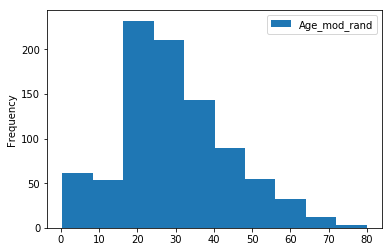

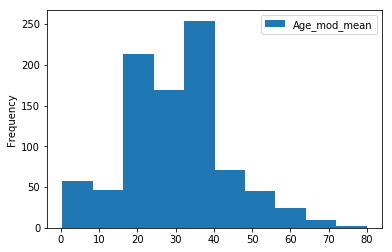

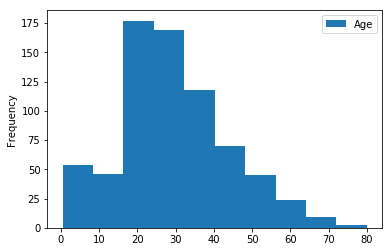

In [21]:
df_train[['Age_mod_rand']].plot.hist()
plt.show()
df_train[['Age_mod_mean']].plot.hist()
plt.show()
df_train[['Age']].plot.hist()
plt.show()

In [22]:
most_embarked = df_train.Embarked.dropna().mode()[0]
most_embarked

'S'

In [23]:
for data in combine:
    data['Embarked'] = data['Embarked'].fillna(most_embarked)

In [24]:
for data in combine:
    data['Embarked_map'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [25]:
import statsmodels.api as sm

/Users/CodyGette/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:
predictors = ['Pclass','Female','Age_bin_rand','Embarked_map']
X = df_train[predictors]
y = df_train['Survived']
    
logit = sm.Logit(y, X)
result_rand = logit.fit()


predictors2 = ['Pclass','Female','Age_bin_mean','Embarked_map']
X2 = df_train[predictors2]
y2 = df_train['Survived']
    
logit = sm.Logit(y2, X2)
result_mean = logit.fit()


Optimization terminated successfully.
         Current function value: 0.464678
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464625
         Iterations 6


In [27]:
result_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Thu, 15 Mar 2018   Pseudo R-squ.:                  0.3022
Time:                        20:35:00   Log-Likelihood:                -414.03
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.049e-77
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Pclass          -0.7497      0.075     -9.995      0.000      -0.897      -0.603
Female           2.6459      0.178     14.858      0.000       2.297       2.995
Age_bin_rand    -0.0095      0.055     -0.173      0.863      -0.117       0.098
Embarked_map     0.3389      0.133      2.541      0.011       0.078       0.600
================================================================================
"""

In [28]:
result_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Thu, 15 Mar 2018   Pseudo R-squ.:                  0.3023
Time:                        20:35:02   Log-Likelihood:                -413.98
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.956e-77
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Pclass          -0.7399      0.076     -9.794      0.000      -0.888      -0.592
Female           2.6451      0.178     14.879      0.000       2.297       2.993
Age_bin_mean    -0.0193      0.055     -0.351      0.726      -0.127       0.088
Embarked_map     0.3408      0.133      2.555      0.011       0.079       0.602
================================================================================
"""

In [29]:
for data in combine:
    data['Child_rand']=np.where(data["Age_bin_rand"]==1,1,0)
    data['Child_mean']=np.where(data["Age_bin_mean"]==1,1,0)
    data['Old_rand']=np.where(data["Age_bin_rand"]==5,1,0)
    data['Old_mean']=np.where(data["Age_bin_rand"]==5,1,0)

In [30]:
predictors = ['Pclass','Female','Child_rand','Embarked_map','Old_rand']
X = df_train[predictors]
y = df_train['Survived']
    
logit = sm.Logit(y, X)
result_rand = logit.fit()


predictors2 = ['Pclass','Female','Child_mean','Embarked_map','Old_rand']
X2 = df_train[predictors2]
y2 = df_train['Survived']
    
logit = sm.Logit(y2, X2)
result_mean = logit.fit()



Optimization terminated successfully.
         Current function value: 0.459390
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454252
         Iterations 6


In [31]:
result_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 Mar 2018   Pseudo R-squ.:                  0.3101
Time:                        20:35:04   Log-Likelihood:                -409.32
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.250e-78
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Pclass          -0.8039      0.057    -14.165      0.000      -0.915      -0.693
Female           2.6001      0.179     14.518      0.000       2.249       2.951
Child_rand       0.7807      0.257      3.033      0.002       0.276       1.285
Embarked_map     0.3503      0.134      2.617      0.009       0.088       0.613
Old_rand        -0.3264      0.807     -0.404      0.686      -1.909       1.256
================================================================================
"""

In [32]:
result_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 Mar 2018   Pseudo R-squ.:                  0.3178
Time:                        20:35:05   Log-Likelihood:                -404.74
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.369e-80
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Pclass          -0.8290      0.058    -14.285      0.000      -0.943      -0.715
Female           2.6321      0.181     14.532      0.000       2.277       2.987
Child_mean       1.1499      0.270      4.264      0.000       0.621       1.678
Embarked_map     0.3687      0.134      2.753      0.006       0.106       0.631
Old_rand        -0.2968      0.809     -0.367      0.714      -1.882       1.288
================================================================================
"""

In [33]:
for data in combine:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [34]:
embarked1 = pd.get_dummies(df_train['Embarked'], prefix = 'from')
df_train = df_train.join(embarked1,how='outer')

embarked2 = pd.get_dummies(df_test['Embarked'], prefix = 'from')
df_test = df_test.join(embarked2,how='outer')

ages1 = pd.get_dummies(df_train['Age_bin_rand'],prefix='inAge_rand')
ages2 = pd.get_dummies(df_train['Age_bin_mean'],prefix='inAge_mean')
df_train = df_train.join(ages1)
df_train = df_train.join(ages2)

ages1 = pd.get_dummies(df_test['Age_bin_rand'],prefix='inAge_rand')
ages2 = pd.get_dummies(df_test['Age_bin_mean'],prefix='inAge_mean')
df_test = df_test.join(ages1)
df_test = df_test.join(ages2)

In [35]:
df_test.columns.values.tolist()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Title',
 'Female',
 'Age_rand',
 'Age_mod_rand',
 'Age_mod_mean',
 'Age_bin_rand',
 'Age_bin_mean',
 'Embarked_map',
 'Child_rand',
 'Child_mean',
 'Old_rand',
 'Old_mean',
 'FamilySize',
 'from_C',
 'from_Q',
 'from_S',
 'inAge_rand_1.0',
 'inAge_rand_2.0',
 'inAge_rand_3.0',
 'inAge_rand_4.0',
 'inAge_rand_5.0',
 'inAge_mean_1.0',
 'inAge_mean_2.0',
 'inAge_mean_3.0',
 'inAge_mean_4.0',
 'inAge_mean_5.0']

In [36]:
predictors = ['Pclass','Female','Child_rand',"FamilySize",'Embarked_map']
X = df_train[predictors]
y = df_train['Survived']
    
logit = sm.Logit(y, X)
result_rand = logit.fit()


predictors2 = ['Pclass','Female','Child_mean',"FamilySize",'Embarked_map']
X2 = df_train[predictors2]
y2 = df_train['Survived']
    
logit = sm.Logit(y2, X2)
result_mean = logit.fit()




Optimization terminated successfully.
         Current function value: 0.455723
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.448483
         Iterations 6


In [37]:
result_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 Mar 2018   Pseudo R-squ.:                  0.3156
Time:                        20:35:08   Log-Likelihood:                -406.05
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 8.723e-80
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Pclass          -0.7178      0.065    -11.051      0.000      -0.845      -0.590
Female           2.7328      0.187     14.588      0.000       2.366       3.100
Child_rand       1.0378      0.283      3.667      0.000       0.483       1.593
FamilySize      -0.1489      0.059     -2.511      0.012      -0.265      -0.033
Embarked_map     0.3234      0.136      2.377      0.017       0.057       0.590
================================================================================
"""

In [38]:
result_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 Mar 2018   Pseudo R-squ.:                  0.3265
Time:                        20:35:10   Log-Likelihood:                -399.60
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.425e-82
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Pclass          -0.7208      0.066    -10.940      0.000      -0.850      -0.592
Female           2.8096      0.191     14.692      0.000       2.435       3.184
Child_mean       1.5378      0.305      5.039      0.000       0.940       2.136
FamilySize      -0.1903      0.062     -3.093      0.002      -0.311      -0.070
Embarked_map     0.3392      0.136      2.486      0.013       0.072       0.607
================================================================================
"""

In [39]:
df_train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Title',
 'Female',
 'Age_rand',
 'Age_mod_rand',
 'Age_mod_mean',
 'Age_bin_rand',
 'Age_bin_mean',
 'Embarked_map',
 'Child_rand',
 'Child_mean',
 'Old_rand',
 'Old_mean',
 'FamilySize',
 'from_C',
 'from_Q',
 'from_S',
 'inAge_rand_1.0',
 'inAge_rand_2.0',
 'inAge_rand_3.0',
 'inAge_rand_4.0',
 'inAge_rand_5.0',
 'inAge_mean_1.0',
 'inAge_mean_2.0',
 'inAge_mean_3.0',
 'inAge_mean_4.0',
 'inAge_mean_5.0']

In [40]:
df_train.rename(index=str, columns ={'inAge_rand_1.0':'Ager_0-16', 'inAge_rand_2.0':'Ager_16-25', 'inAge_rand_3.0':'Ager_25-40', 'inAge_rand_4.0':'Ager_40-60', 'inAge_rand_5.0':'Ager_60+'}, inplace=True)
df_train.rename(index=str, columns={'inAge_mean_1.0':'Agem_0-16', 'inAge_mean_2.0':'Agem_16-25', 'inAge_mean_3.0':'Agem_25-40', 'inAge_mean_4.0':'Agem_40-60', 'inAge_mean_5.0':'Agem_60+'}, inplace=True)

In [41]:
df_test.rename(index=str, columns ={'inAge_rand_1.0':'Ager_0-16', 'inAge_rand_2.0':'Ager_16-25', 'inAge_rand_3.0':'Ager_25-40', 'inAge_rand_4.0':'Ager_40-60', 'inAge_rand_5.0':'Ager_60+'}, inplace=True)
df_test.rename(index=str, columns={'inAge_mean_1.0':'Agem_0-16', 'inAge_mean_2.0':'Agem_16-25', 'inAge_mean_3.0':'Agem_25-40', 'inAge_mean_4.0':'Agem_40-60', 'inAge_mean_5.0':'Agem_60+'}, inplace=True)

In [42]:
df_test.columns.values.tolist()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Title',
 'Female',
 'Age_rand',
 'Age_mod_rand',
 'Age_mod_mean',
 'Age_bin_rand',
 'Age_bin_mean',
 'Embarked_map',
 'Child_rand',
 'Child_mean',
 'Old_rand',
 'Old_mean',
 'FamilySize',
 'from_C',
 'from_Q',
 'from_S',
 'Ager_0-16',
 'Ager_16-25',
 'Ager_25-40',
 'Ager_40-60',
 'Ager_60+',
 'Agem_0-16',
 'Agem_16-25',
 'Agem_25-40',
 'Agem_40-60',
 'Agem_60+']

In [43]:
data_out_train = df_train[cols_to_keep_train]
data_out_test = df_test[cols_to_keep_test]

NameError: name 'cols_to_keep_train' is not defined

In [60]:


predictors = ['Pclass','Female',"FamilySize",'Ager_0-16',
 'Ager_16-25',
 'Ager_25-40',
 'Ager_40-60']
X = df_train[predictors]
y = df_train['Survived']
    
logit = sm.Logit(y, X)
result_rand = logit.fit()


predictors2 = ['Pclass','Female',"FamilySize",'Agem_0-16',
 'Agem_16-25',
 'Agem_25-40',
 'Agem_40-60']
X2 = df_train[predictors2]
y2 = df_train['Survived']
    
logit = sm.Logit(y2, X2)
result_mean = logit.fit()

Optimization terminated successfully.
         Current function value: 0.446302
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.437478
         Iterations 6


In [61]:
result_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Thu, 15 Mar 2018   Pseudo R-squ.:                  0.3298
Time:                        20:44:16   Log-Likelihood:                -397.65
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.027e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.0859      0.115     -9.477      0.000      -1.310      -0.861
Female         2.7686      0.197     14.018      0.000       2.381       3.156
FamilySize    -0.2447      0.068     -3.580      0.000      -0.379      -0.111
Ager_0-16      2.4583      0.443      5.552      0.000       1.590       3.326
Ager_16-25     1.3066      0.333      3.927      0.000       0.654       1.959
Ager_25-40     1.3356      0.295      4.530      0.000       0.758       1.913
Ager_40-60     0.7945      0.293      2.712      0.007       0.220       1.369
==============================================================================
"""

In [62]:
result_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Thu, 15 Mar 2018   Pseudo R-squ.:                  0.3430
Time:                        20:44:17   Log-Likelihood:                -389.79
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 8.446e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1268      0.117     -9.660      0.000      -1.355      -0.898
Female         2.8596      0.206     13.912      0.000       2.457       3.263
FamilySize    -0.2953      0.072     -4.123      0.000      -0.436      -0.155
Agem_0-16      3.0936      0.469      6.595      0.000       2.174       4.013
Agem_16-25     1.3714      0.350      3.915      0.000       0.685       2.058
Agem_25-40     1.4507      0.293      4.948      0.000       0.876       2.025
Agem_40-60     0.8867      0.313      2.836      0.005       0.274       1.499
==============================================================================
"""

In [125]:
cols_to_keep_train = ['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Female',"FamilySize",'Ager_0-16',
 'Ager_16-25',
 'Ager_25-40',
 'Ager_40-60',
 'Ager_60+',
 'Agem_0-16',
 'Agem_16-25',
 'Agem_25-40',
 'Agem_40-60',
 'Agem_60+','from_C']

cols_to_keep_test = ['PassengerId',
 'Pclass',
 'Name',
 'Female',"FamilySize",'Ager_0-16',
 'Ager_16-25',
 'Ager_25-40',
 'Ager_40-60',
 'Ager_60+',
 'Agem_0-16',
 'Agem_16-25',
 'Agem_25-40',
 'Agem_40-60',
 'Agem_60+','from_C']